# Lead Scoring - Case Study
## Problem Statement
An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.


## Goals of Case Study

There are quite a few goals for this case study.

1- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

2- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.



### 1) Importing necessary modules 

In [86]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
#Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Reading the dataset 

In [87]:
df_leads = pd.read_csv("Leads.csv")

In [88]:
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### 2) Inspecting the dataframe 

In [89]:
#Let's check the dimesions of the dataframe
df_leads.shape


(9240, 37)

In [90]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [91]:
df_leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Exploratory Data Analysis 

### 3) Data cleaning

As can be seen,there are few columns with level called 'Select' which means that the customer had not selected the option for that particular column which is why it shows 'Select'. These values are as good as missing values and hence we will convert 'Select' values to Nan

In [92]:
df_leads = df_leads.replace('select',np.nan)
df_leads = df_leads.replace('Select',np.nan)

In [93]:
# Dropping unique valued columns
df_leads= df_leads.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)


In [94]:
#Checking for count of missing values in each column
round(100*(df_leads.isnull().sum()/len(df_leads.index)), 2)


Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

#### Dropping Columns with Missing Values >=35%

In [95]:
# Removing all the columns that are no required and have 35% null values
df_leads = df_leads.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Tags','Lead Quality','How did you hear about X Education','City','Lead Number'],axis=1)
df_leads.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,Student,Better Career Prospects,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified


In [96]:
df_leads.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,Student,Better Career Prospects,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified


In [97]:
# Rechecking the percentage of missing values
round(100*(df_leads.isnull().sum()/len(df_leads.index)), 2)


Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

___There is a huge value of null variables in 4 columns as seen above. But removing the rows with the null value will cost us a lot of data and they are important columns. So, instead we are going to replace the NaN values with 'not provided'. This way we have all the data and almost no null values. In case these come up in the model, it will be of no use and we can drop it off then.___



In [98]:
df_leads['Specialization'] = df_leads['Specialization'].fillna('not provided') 
df_leads['What matters most to you in choosing a course'] = df_leads['What matters most to you in choosing a course'].fillna('not provided')
df_leads['Country'] = df_leads['Country'].fillna('not provided')
df_leads['What is your current occupation'] = df_leads['What is your current occupation'].fillna('not provided')
df_leads.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [99]:
# Rechecking the percentage of missing values
round(100*(df_leads.isnull().sum()/len(df_leads.index)), 2)


Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [100]:
df_leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [101]:
df_leads['Lead Source'].fillna(df_leads['Lead Source'].mode()[0],inplace= True)

In [102]:
# Rechecking the percentage of missing values
round(100*(df_leads.isnull().sum()/len(df_leads.index)), 2)


Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [103]:
df_leads['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [104]:
df_leads['Last Activity'].fillna(df_leads['Last Activity'].mode()[0],inplace= True)

In [105]:
# Rechecking the percentage of missing values
round(100*(df_leads.isnull().sum()/len(df_leads.index)), 2)


Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [106]:
df_leads['TotalVisits'].fillna(df_leads['TotalVisits'].mode()[0],inplace= True)

In [107]:
df_leads['TotalVisits'].value_counts()

0.0      2326
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [108]:
# Rechecking the percentage of missing values
round(100*(df_leads.isnull().sum()/len(df_leads.index)), 2)


Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.00
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [109]:
df_leads['Page Views Per Visit'].fillna(df_leads['Page Views Per Visit'].mean(),inplace= True)

In [110]:
# Rechecking the percentage of missing values
round(100*(df_leads.isnull().sum()/len(df_leads.index)), 2)


Prospect ID                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [111]:
# To familiarize all the categorical values
for column in df_leads:
    print("Column: ",column)
    print("Value counts: ")
    print(df_leads[column].astype('category').value_counts())
    print('----------------------------------------------------------------------------------------')


Column:  Prospect ID
Value counts: 
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
----------------------------------------------------------------------------------------
Column:  Lead Origin
Value counts: 
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
----------------------------------------------------------------------------------------
Column:  Lead Source
Value counts: 
Google        

In [112]:
# Removing Id values since they are unique for everyone
df_final = df_leads.drop('Prospect ID',axis=1)
df_final.shape


(9240, 21)

###  Categorical Variables Analysis

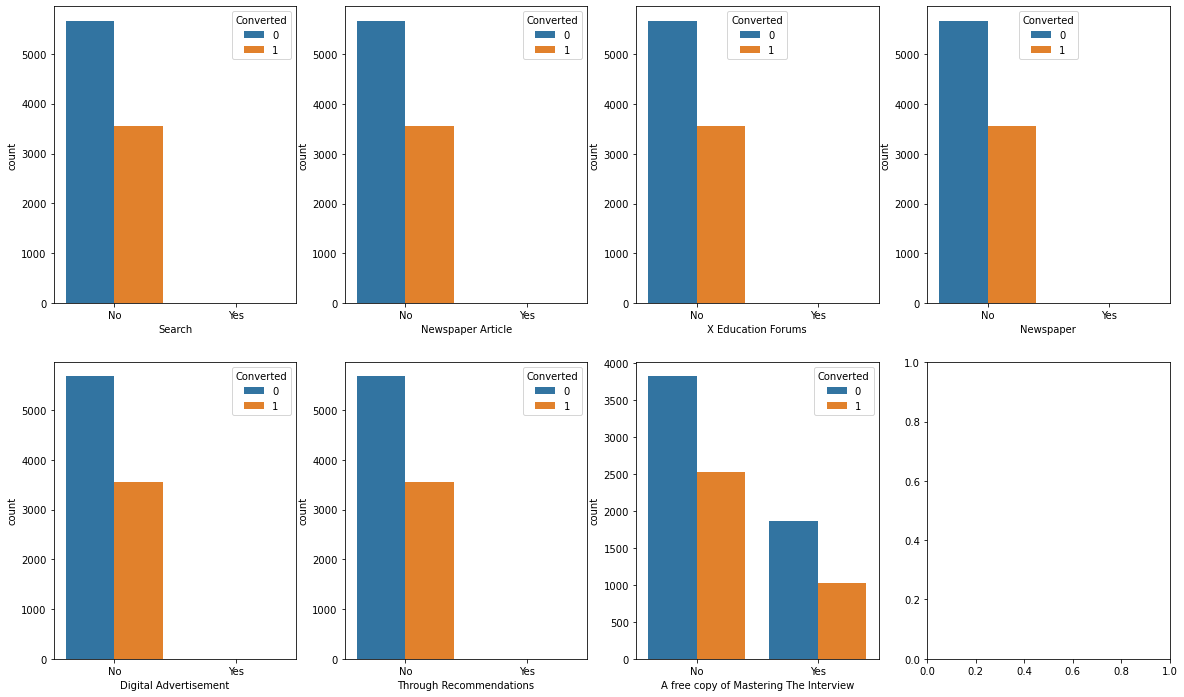

In [113]:
# Visualzing  variables for imbalancing
fig, axs = plt.subplots(2,4,figsize = (20,12))
sns.countplot(x = "Search", hue = "Converted", data = df_final, ax = axs[0,0])
# sns.countplot(x = "Magazine", hue = "Converted", data = df_final, ax = axs[0,1])
sns.countplot(x = "Newspaper Article", hue = "Converted", data = df_final, ax = axs[0,1])
sns.countplot(x = "X Education Forums", hue = "Converted", data = df_final, ax = axs[0,2])
sns.countplot(x = "Newspaper", hue = "Converted", data = df_final, ax = axs[0,3])
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = df_final, ax = axs[1,0])
sns.countplot(x = "Through Recommendations", hue = "Converted", data = df_final, ax = axs[1,1])
# sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = df_final, ax = axs[1,3])
# sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data =df_final, ax = axs[2,0])
# sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = df_final, ax = axs[2,1])
# sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = df_final, ax = axs[2,2])
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = df_final, ax = axs[1,2])
plt.show()

### Inference
- For all these columns except 'A free copy of Mastering The Interview','Lead Origin','' data is highly imbalanced, thus we will drop them
- "A free copy of Mastering The Interview" is a redundant variable so we will include this also in list of dropping columns.


In [114]:
df_final.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [115]:
cols_to_drop=['Search','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']


In [116]:
cols_to_drop

['Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'A free copy of Mastering The Interview']

In [117]:
df_final.drop(columns=cols_to_drop,axis=1, inplace=True)


### Column: Lead Source

In [118]:
#checking value counts of Lead Source column

df_final['Lead Source'].value_counts(ascending=False)#.plot.barh()


Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [119]:
#'Lead Source' is having same label name 'Google' but in different format i.e 'google', So converting google to Google
df_final['Lead Source'] = df_final['Lead Source'].replace('google','Google')


In [120]:
#combining low frequency values to Others

df_final['Lead Source'] = df_final['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM','Live Chat'] ,'Others')


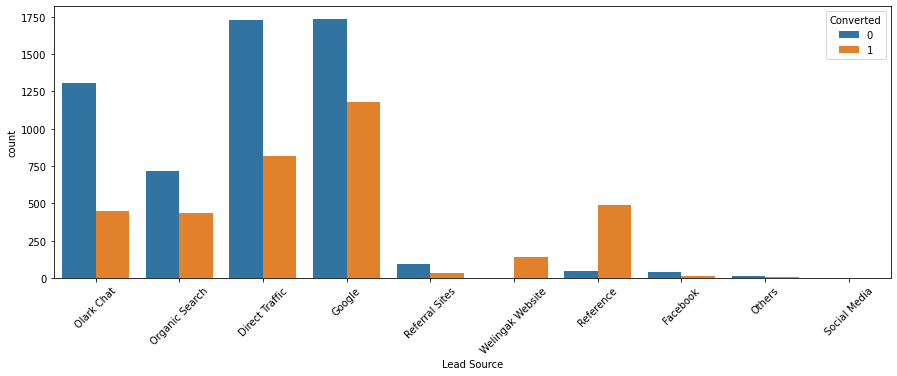

In [121]:
#visualizing count of Lead Source Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Lead Source', hue='Converted' , data =df_final )
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()


### Inference

- Maximum Leads are generated by Google and Direct Traffic.

- Conversion rate of Reference leads and Welinkgak Website leads is very high.



### Column: Country

In [122]:
#checking value counts of Country column

df_final['Country'].value_counts(ascending=False)#.plot.barh()
# plt.show()


India                   6492
not provided            2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

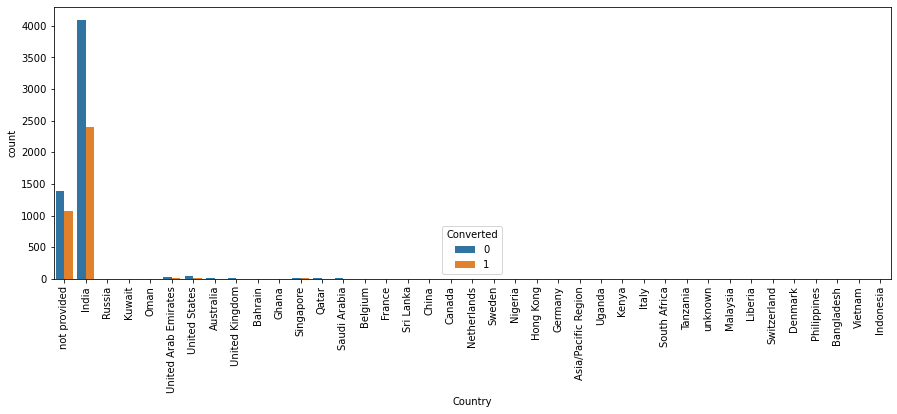

In [123]:
# Visualizing Country variable after imputation
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Country', hue='Converted' , data =df_final)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()


### Inference
As we can see that most of the data consists of value 'India', no inference can be drawn from this parameter.Hence, we can drop this column



In [124]:
df_final.drop(columns='Country',axis=1,inplace=True)

In [125]:
df_final.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course',
       'Last Notable Activity'],
      dtype='object')

### Column: What is your current occupation 

In [126]:
df_final['What is your current occupation'].value_counts(ascending=False)#.plot.barh()
# plt.show()

Unemployed              5600
not provided            2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

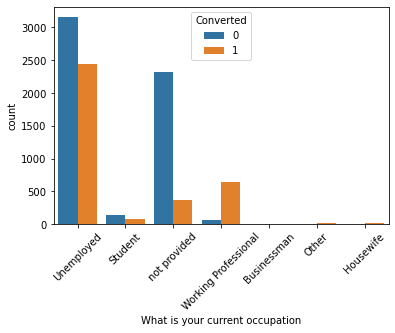

In [127]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(x='What is your current occupation', hue='Converted' , data = df_final)
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()


### Inference

- Maximum leads generated are unemployed and their conversion rate is more than 50%.
- Conversion rate of working professionals is very high.


### Column: What matters most to you in choosing a course



In [128]:
#checking value counts of 'What matters most to you in choosing a course'

df_final['What matters most to you in choosing a course'].value_counts(ascending=False)#.plot.barh()
# plt.show()

Better Career Prospects      6528
not provided                 2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

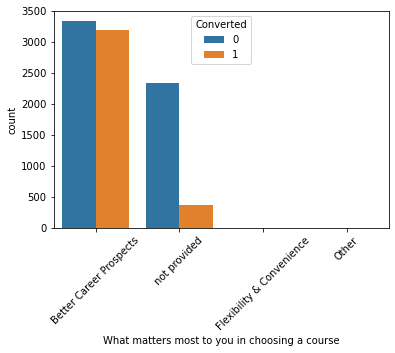

In [129]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(x= 'What matters most to you in choosing a course', hue='Converted' , data = df_final)
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()


### Column: Last Activity 

In [130]:
#checking value counts of Last Activity
df_final['Last Activity'].value_counts(ascending=False)#.plot.barh()


Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [131]:
#combining low frequency values
df_final['Last Activity'] = df_final['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                       'Had a Phone Conversation', 
                                                       'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')


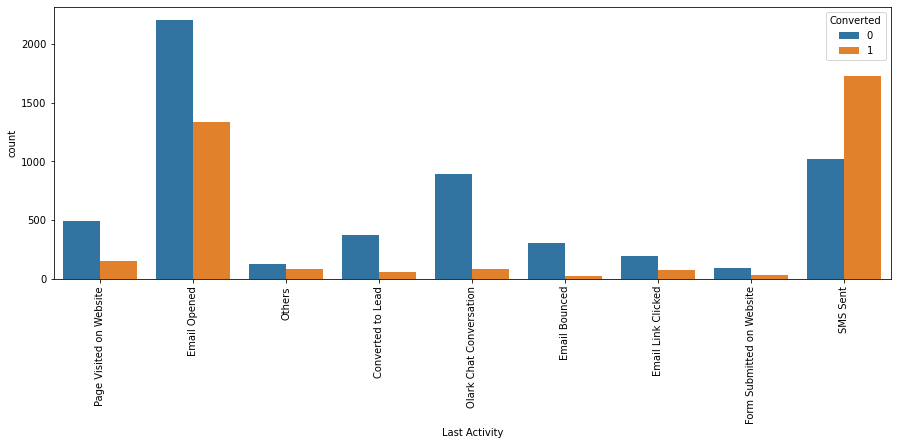

In [132]:
#visualizing count of Last Activity Variable 

plt.figure(figsize=(15,5))
s1=sns.countplot(x='Last Activity', hue='Converted' , data = df_final )
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()


### Inference

- Maximum leads are generated having last activity as Email opened but conversion rate is not too good.
- SMS sent as last acitivity has high conversion rate.


In [133]:
# Append 'Last Activity' to the cols_to_drop List it is a X-education's sales team generated data
df_final.drop(columns='Last Activity',axis=1,inplace=True)

### Column: Lead Origin 

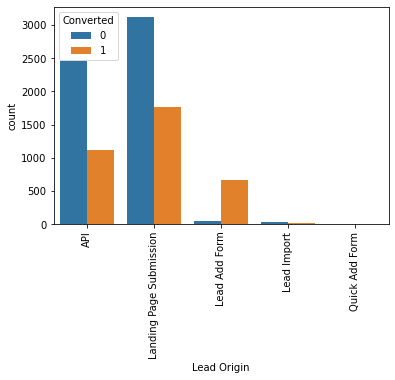

In [134]:
s1=sns.countplot(x='Lead Origin', hue='Converted' , data = df_final )
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()


### Columns: Do Not Email & Do Not Call

 

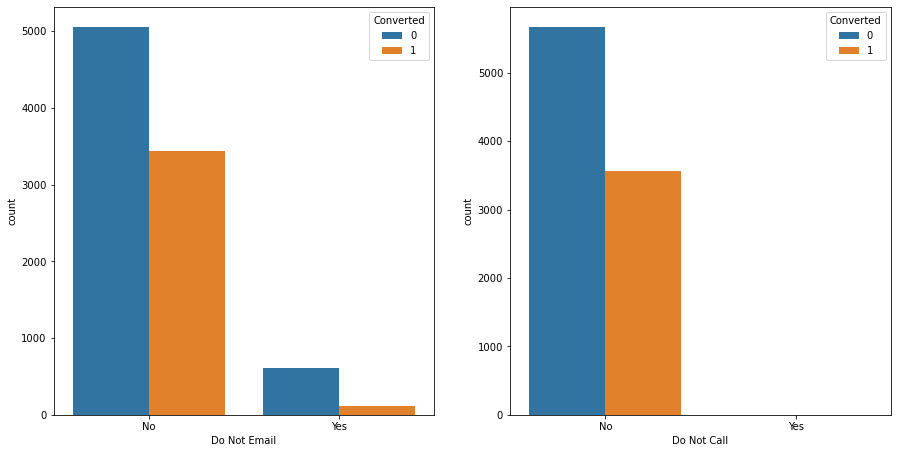

In [135]:
fig, axs = plt.subplots(1,2,figsize = (15,7.5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = df_final, ax = axs[0])
sns.countplot(x = "Do Not Call", hue = "Converted", data = df_final, ax = axs[1])
plt.show()


### Inference
- We can append the Do Not Call Column to the list of Columns to be Dropped data is skewed

In [136]:
df_final.drop(columns=['Do Not Call'], axis=1, inplace=True)

### Column: Last Notable Activity 

In [137]:
#checking value counts of last Notable Activity
df_final['Last Notable Activity'].value_counts(ascending=False)


Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [138]:
#clubbing lower frequency values

df_final['Last Notable Activity'] = df_final['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Others')


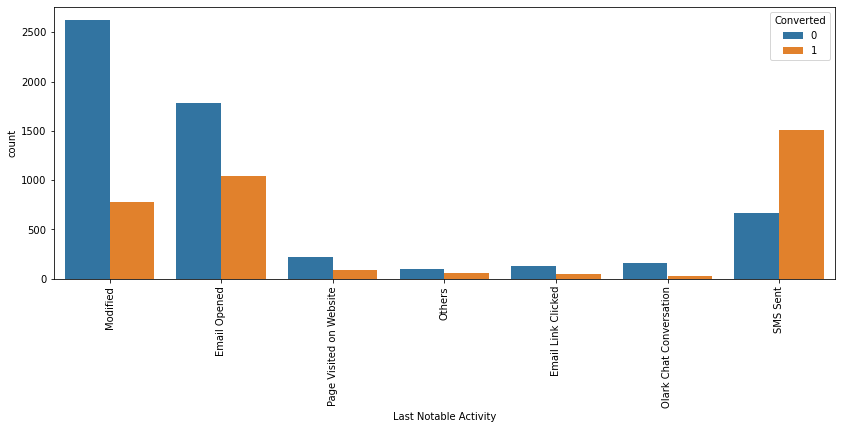

In [139]:
#visualizing count of Variable based on Converted value

plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = df_final)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()


### Inference

- Maximum leads are generated having last activity as Email opened but conversion rate is not too good.
- SMS sent as last acitivity has high conversion rate.


In [140]:
# Append 'Last Notable Activity'to the cols_to_drop List as this is a sales team generated data
df_final.drop(columns='Last Notable Activity', axis=1, inplace=True)

In [141]:
df_final.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course'],
      dtype='object')

### Column: Specialization 

In [142]:
df_final['Specialization'].value_counts()

not provided                         3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

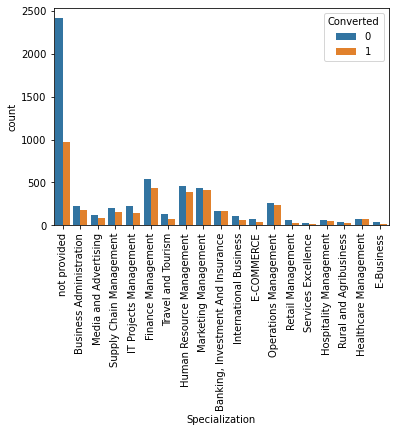

In [143]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(x='Specialization', hue='Converted' , data = df_final)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()


###  Numerical Attributes Analysis


### Target column: Converted 

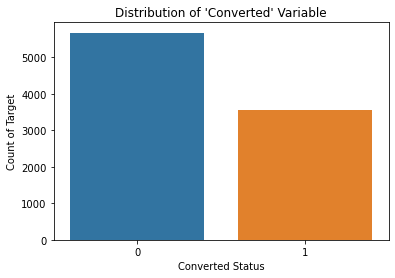

In [144]:
#Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0).
#Visualizing Distribution of 'Converted' Variable
sns.countplot(df_final.Converted)
plt.xlabel("Converted Status")
plt.ylabel("Count of Target")
plt.title("Distribution of 'Converted' Variable")
plt.show()


In [145]:
# Finding out conversion rate
Converted = (sum(df_final['Converted'])/len(df_final['Converted'].index))*100
Converted


38.53896103896104

#### Lead Conversion rate is 38% only
 

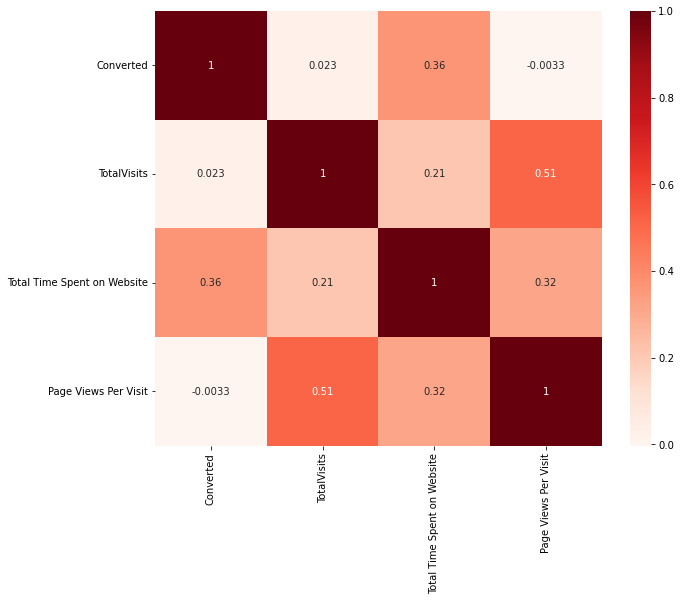

In [146]:
#Checking correlations of numeric values using heatmap

# Size of the figure
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(df_final.corr(), cmap="Reds", annot=True)
plt.show()


### Column: Total Visits

 

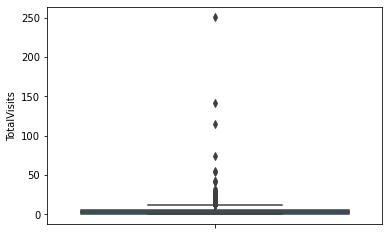

In [147]:
#visualizing spread of variable Total Visits

sns.boxplot(y=df_final['TotalVisits'])
plt.show()


In [148]:
#checking percentile values for "Total Visits"

df_final['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])


count    9240.000000
mean        3.394156
std         4.836682
min         0.000000
5%          0.000000
25%         0.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

### Inference: 
There is outliers present 

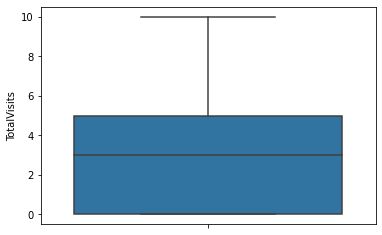

In [149]:
#Outlier Treatment: capping the outliers to 95% value for analysis

percentiles = df_final['TotalVisits'].quantile([0.05,0.95]).values
df_final['TotalVisits'][df_final['TotalVisits'] <= percentiles[0]] = percentiles[0]
df_final['TotalVisits'][df_final['TotalVisits'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=df_final['TotalVisits'])
plt.show()


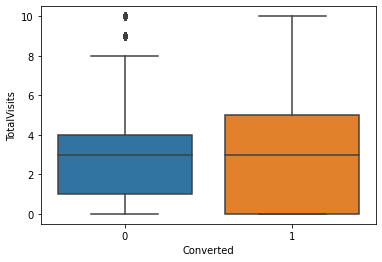

In [150]:
# Visualizing TotalVisits w.r.t Target Variable 'Converted'
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df_final)
plt.show()


### Inference
As the median for both converted and non-converted leads are same , nothing coclusive can be said on the basis of variable TotalVisits



### Column: Total time spent on website

 

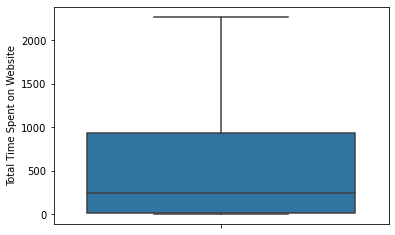

In [151]:
#visualizing spread of variable Total Time Spent on Website

sns.boxplot(y=df_final['Total Time Spent on Website'])
plt.show()


In [152]:
#checking percentiles for "Total Time Spent on Website"

df_final['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])


count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
5%          0.000000
25%        12.000000
50%       248.000000
75%       936.000000
90%      1380.000000
95%      1562.000000
99%      1840.610000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

### Inference:
Since there are no major outliers for "Total Time Spent on Website", outlier treatment is not required for it

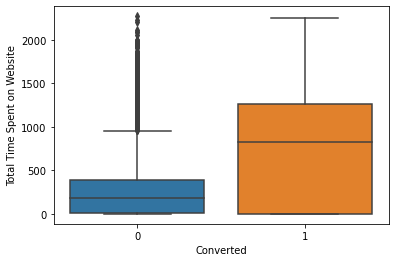

In [153]:
# Visualizing 'Total Time Spent on Website' w.r.t Target Variable 'converted'
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df_final)
plt.show()


### Inference
As can be seen, leads spending more time on website are more likely to convert , thus website should be made more enagaging to increase conversion rate



### Column: Page views per visit

 

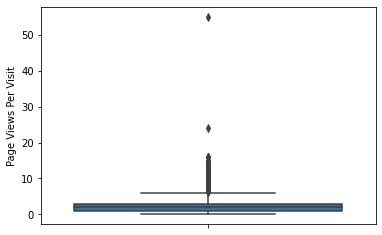

In [154]:
#visualizing spread of variable Total Time Spent on Website

sns.boxplot(y=df_final['Page Views Per Visit'])
plt.show()


### Inference:
Outliers are present

In [155]:
#checking percentiles for "df_final"

df_final['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])


count    9240.000000
mean        2.362820
std         2.145333
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

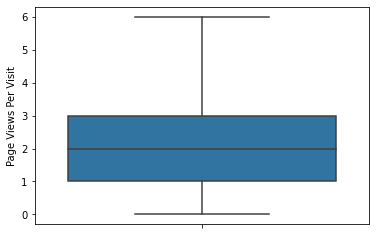

In [156]:
#Outlier Treatment: capping the outliers to 95% value for analysis
percentiles = df_final['Page Views Per Visit'].quantile([0.05,0.95]).values
df_final['Page Views Per Visit'][df_final['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
df_final['Page Views Per Visit'][df_final['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=df_final['Page Views Per Visit'])
plt.show()


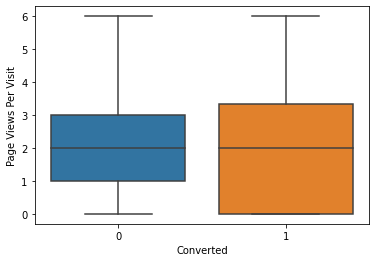

In [157]:
#visualizing 'Page Views Per Visit' w.r.t Target variable 'Converted'
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df_final)
plt.show()


### Inference

- Median for converted and not converted leads is almost same.
- Nothing conclusive can be said on the basis of Page Views Per Visit

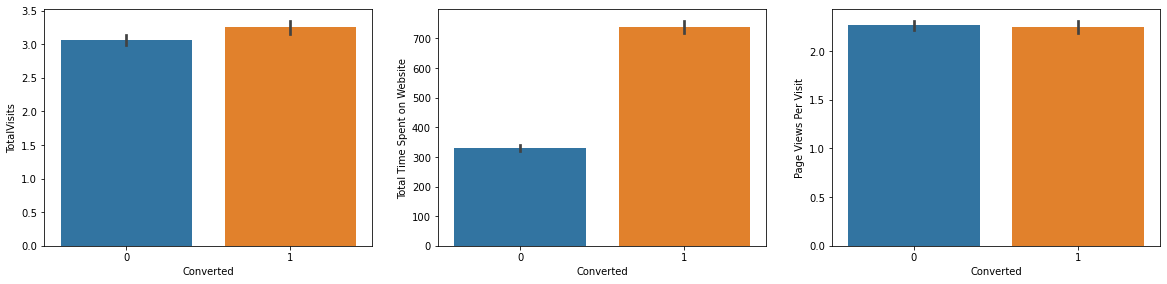

In [158]:
# Now check the conversions for all numeric values

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', data = df_final)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', data = df_final)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', data = df_final)
plt.show()


### Inference
The conversion rate is high for Total Visits, Total Time Spent on Website and Page Views Per Visit


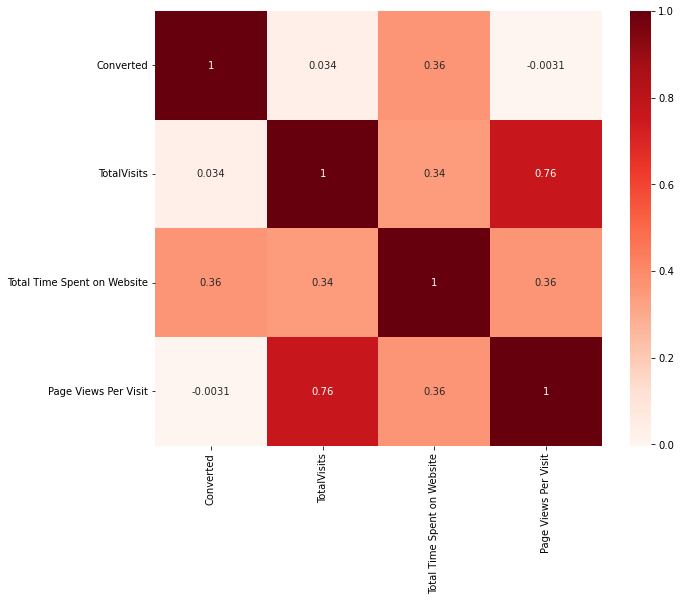

In [160]:
#Checking correlations of numeric values using heatmap after outlier treatment

# Size of the figure
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(df_final.corr(), cmap="Reds", annot=True)
plt.show()
